# Final Year Project Data Science

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("../data/raw/used_cars.csv")

## Data Exploration

In [5]:
print("Shape: ", df.shape)
print("Basic Info")
print(df.info())

Shape:  (38531, 30)
Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool

In [6]:
print("Missing Value")
print(df.isnull().sum())

Missing Value
manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


In [13]:
print(df[df['engine_capacity'].isnull()][
    ['manufacturer_name', 'model_name', 'year_produced', 'price_usd']
])

      manufacturer_name model_name  year_produced  price_usd
8782               Fiat        500           2013    14900.0
9048               Fiat        500           2014    16000.0
24226         Chevrolet       Volt           2013    12950.0
25943            Nissan       Leaf           2015    13850.0
26203            Nissan       Leaf           2011     9300.0
26222            Nissan       Leaf           2014    12900.0
26582            Nissan       Leaf           2014    14500.0
26914            Nissan       Leaf           2013    15500.0
27554               BMW         i3           2015    24750.0
29590               BMW         i3           2018    39999.0


In [7]:
print("Data Types")
print(df.dtypes)

Data Types
manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object


### Seperating Columns type

In [8]:
categ_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
bool_cols = df.select_dtypes(include=['bool']).columns.to_list()
print("Category Cols: ", categ_cols)
print("\nNumerical Cols: ", num_cols)
print("\nBoolean Cols: ", bool_cols)

Category Cols:  ['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain', 'location_region']

Numerical Cols:  ['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']

Boolean Cols:  ['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


### Numerical Column Stats

In [9]:
print(df[num_cols].describe())

       odometer_value  year_produced  engine_capacity     price_usd  \
count    38531.000000   38531.000000     38521.000000  38531.000000   
mean    248864.638447    2002.943734         2.055161   6639.971021   
std     136072.376530       8.065731         0.671178   6428.152018   
min          0.000000    1942.000000         0.200000      1.000000   
25%     158000.000000    1998.000000         1.600000   2100.000000   
50%     250000.000000    2003.000000         2.000000   4800.000000   
75%     325000.000000    2009.000000         2.300000   8990.000000   
max    1000000.000000    2019.000000         8.000000  50000.000000   

       number_of_photos    up_counter  duration_listed  
count      38531.000000  38531.000000     38531.000000  
mean           9.649062     16.306091        80.577249  
std            6.093217     43.286933       112.826569  
min            1.000000      1.000000         0.000000  
25%            5.000000      2.000000        23.000000  
50%            8.0

### Categorical Column Analysis

In [10]:
for col in categ_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].unique()}")
    print(f"Missing: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f})%")

    if df[col].nunique() <= 15:
        print(f"Value Counts: ")
        print(df[col].value_counts().head(10))


manufacturer_name:
Unique values: ['Subaru' 'LADA' 'Dodge' 'УАЗ' 'Kia' 'Opel' 'Москвич' 'Alfa Romeo' 'Acura'
 'Dacia' 'Lexus' 'Mitsubishi' 'Lancia' 'Citroen' 'Mini' 'Jaguar' 'Porsche'
 'SsangYong' 'Daewoo' 'Geely' 'ВАЗ' 'Fiat' 'Ford' 'Renault' 'Seat' 'Rover'
 'Volkswagen' 'Lifan' 'Jeep' 'Cadillac' 'Audi' 'ЗАЗ' 'Toyota' 'ГАЗ'
 'Volvo' 'Chevrolet' 'Great Wall' 'Buick' 'Pontiac' 'Lincoln' 'Hyundai'
 'Nissan' 'Suzuki' 'BMW' 'Mazda' 'Land Rover' 'Iveco' 'Skoda' 'Saab'
 'Infiniti' 'Chery' 'Honda' 'Mercedes-Benz' 'Peugeot' 'Chrysler']
Missing: 0 (0.0)%

model_name:
Unique values: ['Outback' 'Forester' 'Impreza' ... '180' 'Vision' 'Aspen']
Missing: 0 (0.0)%

transmission:
Unique values: ['automatic' 'mechanical']
Missing: 0 (0.0)%
Value Counts: 
transmission
mechanical    25633
automatic     12898
Name: count, dtype: int64

color:
Unique values: ['silver' 'blue' 'red' 'black' 'grey' 'other' 'brown' 'white' 'green'
 'violet' 'orange' 'yellow']
Missing: 0 (0.0)%
Value Counts: 
color
black     7

### Boolean Columns

In [ ]:
print("\n BOOLEAN COLUMNS ")
for col in bool_cols:
    print(f"{col}:")
    print(df[col].value_counts())


--- BOOLEAN COLUMNS ---
engine_has_gas:
engine_has_gas
False    37184
True      1347
Name: count, dtype: int64
has_warranty:
has_warranty
False    38082
True       449
Name: count, dtype: int64
is_exchangeable:
is_exchangeable
False    24945
True     13586
Name: count, dtype: int64
feature_0:
feature_0
False    29725
True      8806
Name: count, dtype: int64
feature_1:
feature_1
True     23396
False    15135
Name: count, dtype: int64
feature_2:
feature_2
False    29907
True      8624
Name: count, dtype: int64
feature_3:
feature_3
False    27904
True     10627
Name: count, dtype: int64
feature_4:
feature_4
False    29227
True      9304
Name: count, dtype: int64
feature_5:
feature_5
False    24811
True     13720
Name: count, dtype: int64
feature_6:
feature_6
False    31943
True      6588
Name: count, dtype: int64
feature_7:
feature_7
False    28369
True     10162
Name: count, dtype: int64
feature_8:
feature_8
False    22528
True     16003
Name: count, dtype: int64
feature_9:
feature_9
Tr

### Handle Missing Values

In [17]:
def handle_missing_values(df):
    df_clean = df.copy()

    print(" Handling Missing Values ")
    
    missing_engine = df_clean['engine_capacity'].isnull().sum()
    df_clean['engine_capacity'] = df_clean['engine_capacity'].fillna(0.0)
    df_clean['is_electric'] = df_clean['engine_capacity'] == 0.0
    print(f"Set {missing_engine} missing engine capacity to 0")
    
    return df_clean

df_clean = handle_missing_values(df)
df_clean.isnull().sum()

 Handling Missing Values 
Set 10 missing engine capacity to 0


manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
is_electric          0
dtype: int64

## Visualising the Distribution of Data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

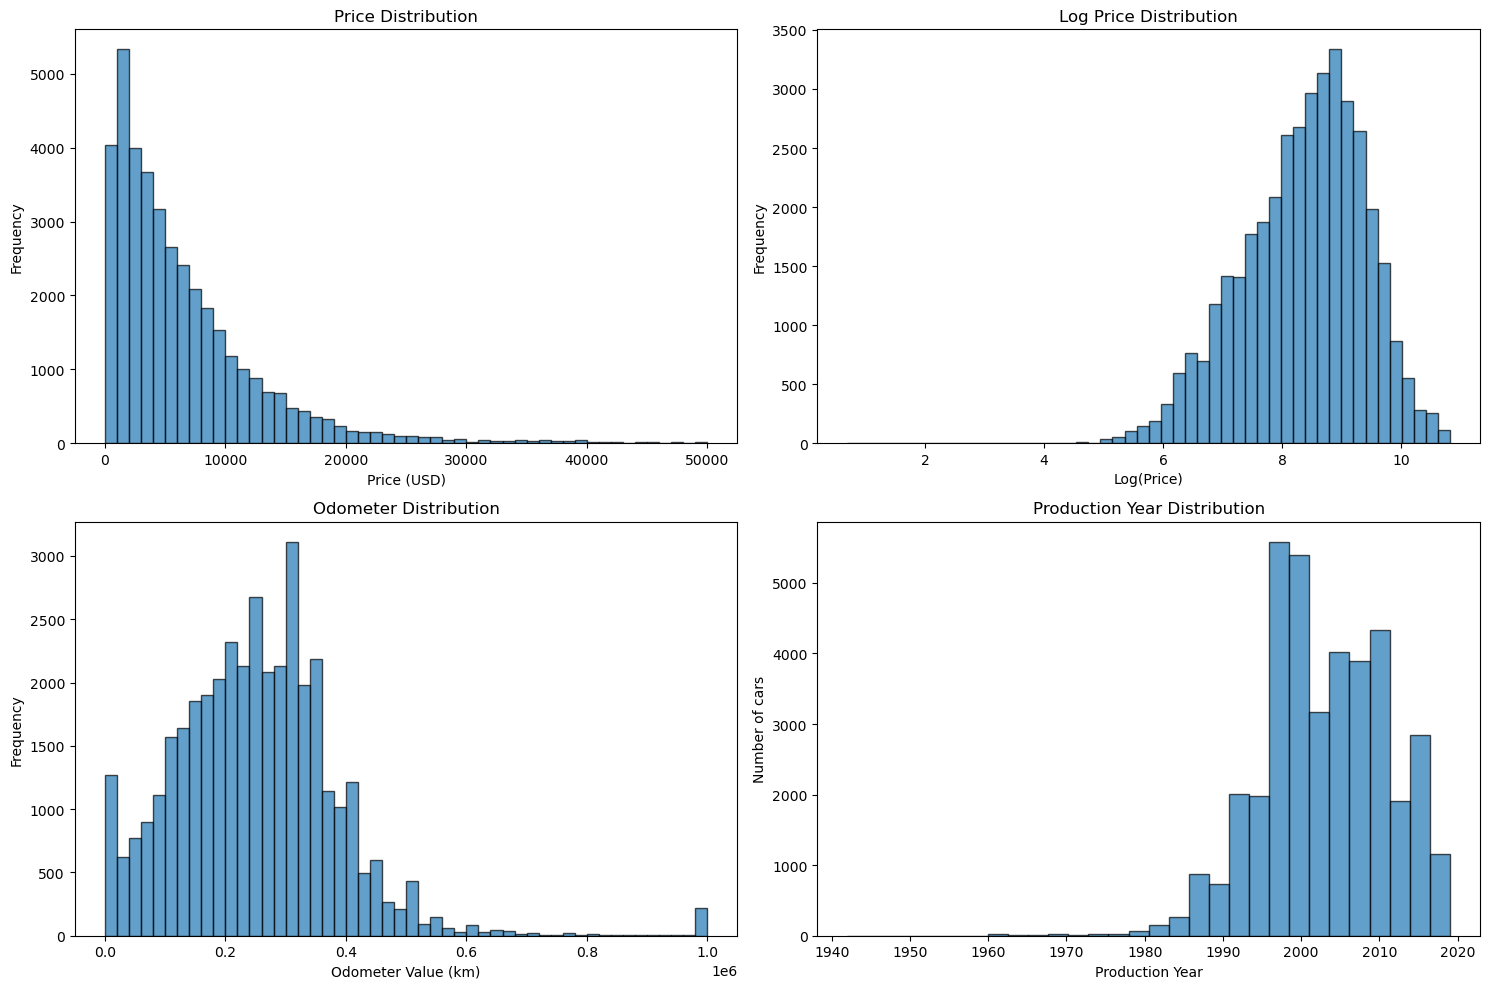

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Price
axes[0,0].hist(df_clean['price_usd'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price (USD)')
axes[0,0].set_ylabel('Frequency')

#Log pirce
axes[0,1].hist(np.log1p(df_clean['price_usd']), bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Log Price Distribution')
axes[0,1].set_xlabel('Log(Price)')
axes[0,1].set_ylabel('Frequency')

#Odomoter
axes[1,0].hist(df_clean['odometer_value'], bins=50, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Odometer Distribution')
axes[1,0].set_xlabel('Odometer Value (km)')
axes[1,0].set_ylabel('Frequency')

#Year produced
axes[1,1].hist(df_clean['year_produced'], bins = 30, edgecolor='black', alpha=0.7)
axes[1,1].set_title("Production Year Distribution")
axes[1,1].set_xlabel('Production Year')
axes[1,1].set_ylabel('Number of cars')

plt.tight_layout()
plt.show()

### Top 10 Manufacturer filter

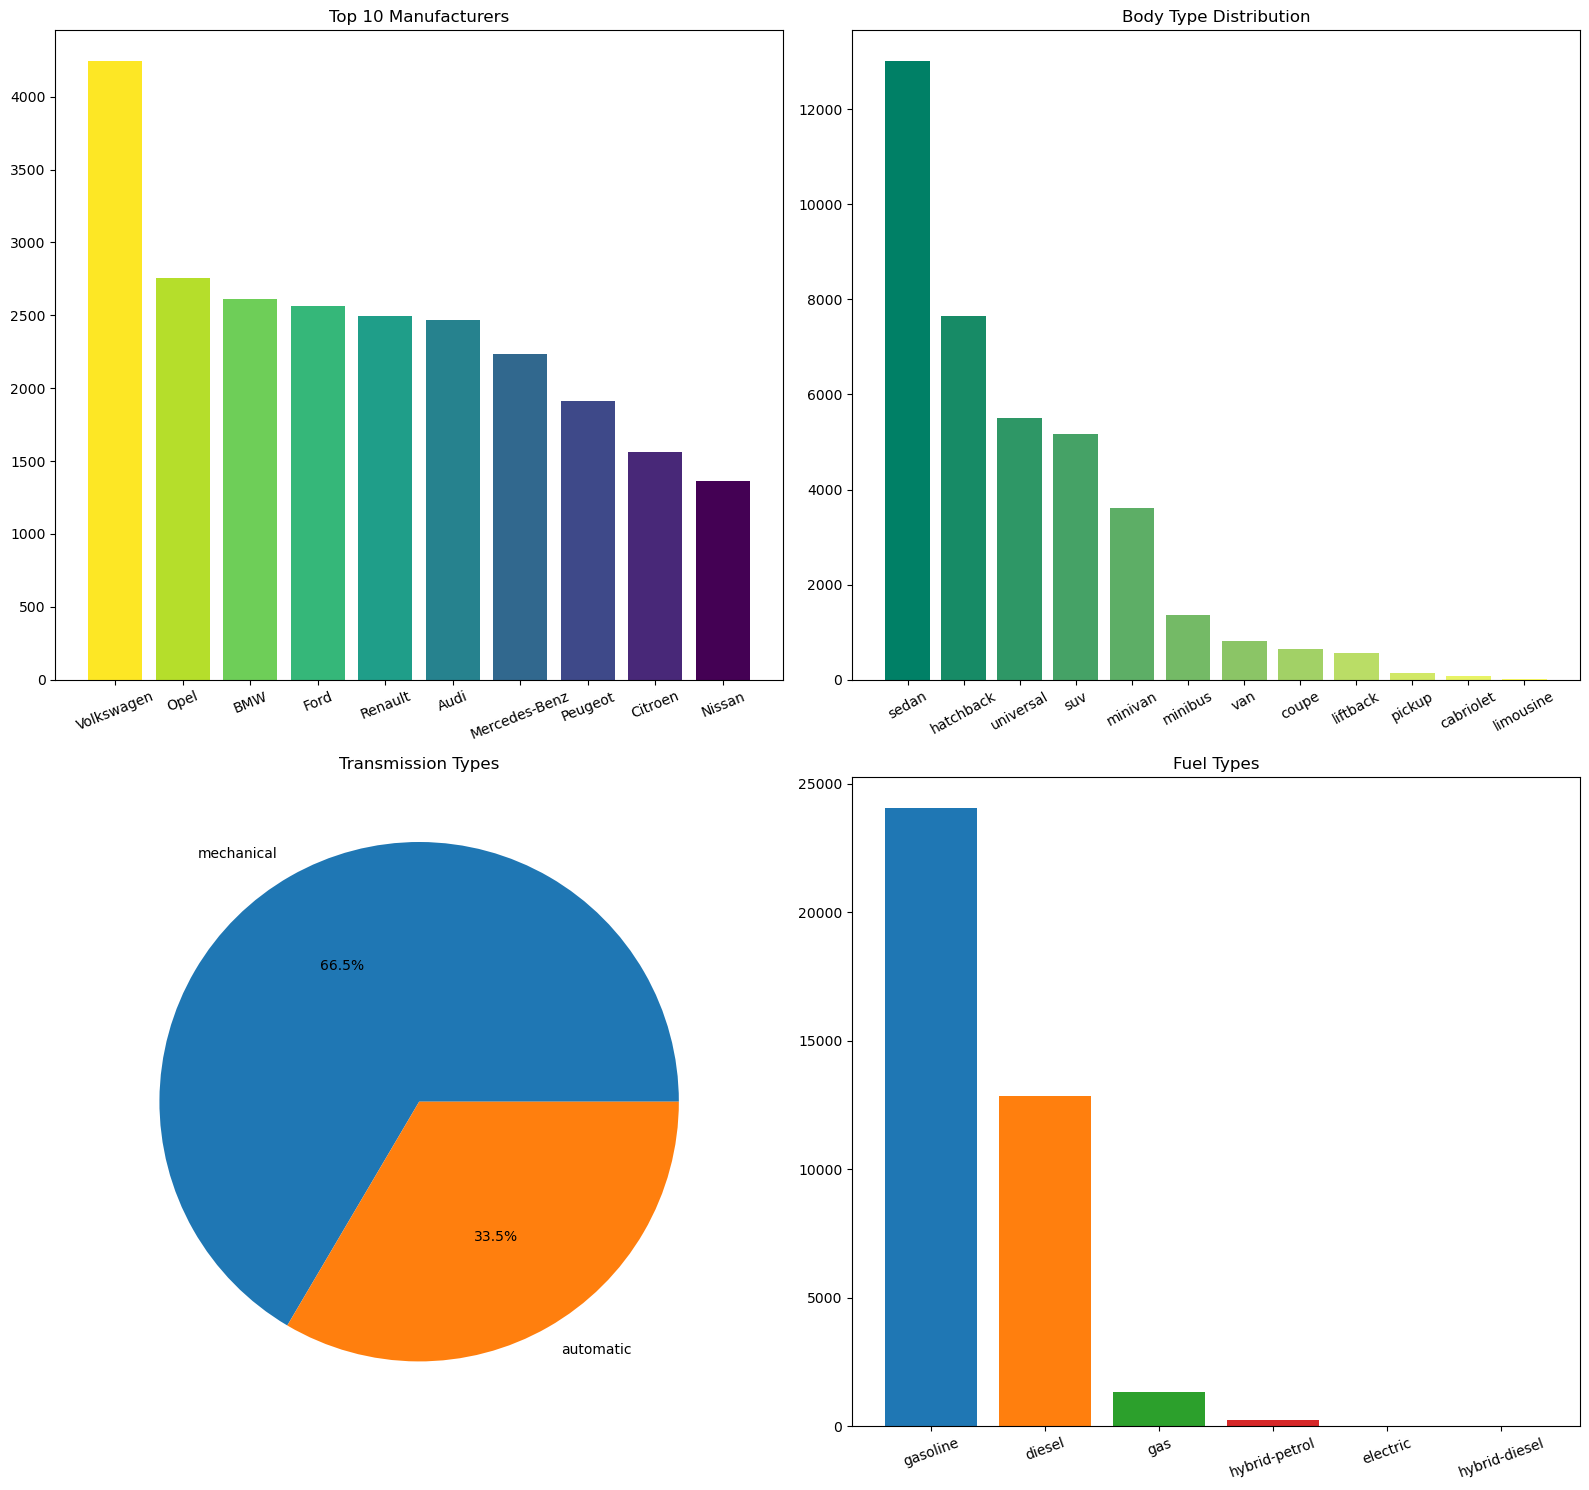

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16,15))
top10_brands = df_clean['manufacturer_name'].value_counts().head(10)
colors = plt.cm.viridis_r(np.linspace(0, 1, len(top10_brands)))

axes[0,0].bar(top10_brands.index, top10_brands.values, color=colors)
axes[0,0].set_title('Top 10 Manufacturers')
axes[0,0].tick_params(axis='x', rotation=22)

body_types = df_clean['body_type'].value_counts()
colors = plt.cm.summer(np.linspace(0, 1, len(body_types)))
axes[0,1].bar(body_types.index, body_types.values, color=colors)
axes[0,1].set_title('Body Type Distribution')
axes[0,1].tick_params(axis='x', rotation=29)

transmission = df_clean['transmission'].value_counts()
axes[1,0].pie(transmission.values, labels=transmission.index, autopct='%1.1f%%')
axes[1,0].set_title('Transmission Types')

fuel_types = df_clean['engine_fuel'].value_counts()
colors_fuel = plt.cm.tab10(np.arange(len(fuel_types)))
axes[1,1].bar(fuel_types.index, fuel_types.values, color=colors_fuel)
axes[1,1].set_title('Fuel Types')
axes[1,1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

In [37]:
df['engine_fuel'].value_counts()

engine_fuel
gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
electric            10
hybrid-diesel        2
Name: count, dtype: int64

#### Removing electric and hybrid-diesel

In [35]:
df_clean = df_clean[
    ~df_clean['engine_fuel'].isin(['electric', 'hybrid-diesel'])
]

df_clean['engine_fuel'].value_counts()


engine_fuel
gasoline         24065
diesel           12872
gas               1347
hybrid-petrol      235
Name: count, dtype: int64

### Seeing the brand vs body distribution

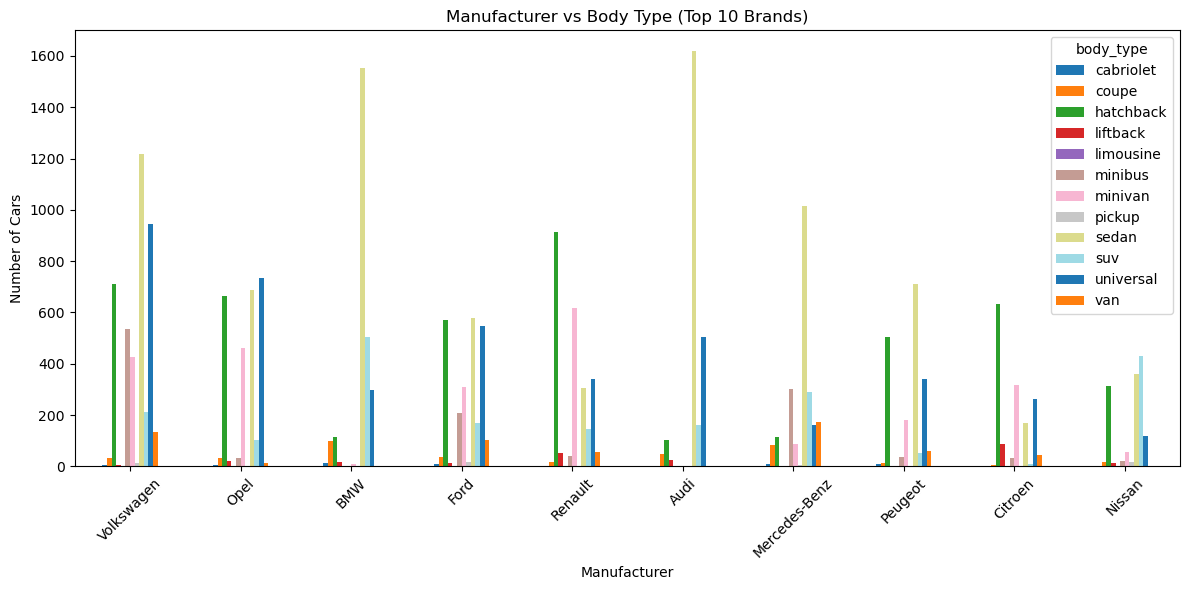

In [64]:
top10_names = top10_brands.index

manu_body = pd.crosstab(
    df_clean['manufacturer_name'],
    df_clean['body_type']
)

manu_body_top10 = manu_body.loc[top10_names]
colors = plt.cm.tab20(np.linspace(0, 1, len(top10_brands)))
manu_body_top10.plot(kind='bar', figsize=(12,6), color=colors)
plt.title("Manufacturer vs Body Type (Top 10 Brands)")
plt.ylabel("Number of Cars")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
pd.crosstab(
    df_clean['manufacturer_name'],
    df_clean['body_type']
)

body_type,cabriolet,coupe,hatchback,liftback,limousine,minibus,minivan,pickup,sedan,suv,universal,van
manufacturer_name,,,,,,,,,,,,
Acura,0,3,2,1,0,0,0,0,28,32,0,0
Alfa Romeo,1,7,51,1,0,0,0,0,135,0,12,0
Audi,3,48,104,26,0,0,1,0,1619,163,504,0
BMW,13,98,113,19,0,0,11,0,1554,504,296,0
Buick,0,0,3,0,0,0,0,0,4,40,0,0
Cadillac,0,6,0,0,2,0,0,0,13,21,1,0
Chery,0,0,19,5,0,0,0,0,11,23,0,0
Chevrolet,0,12,59,1,0,4,22,4,212,104,17,0
Chrysler,6,5,20,0,2,1,218,0,136,14,8,0


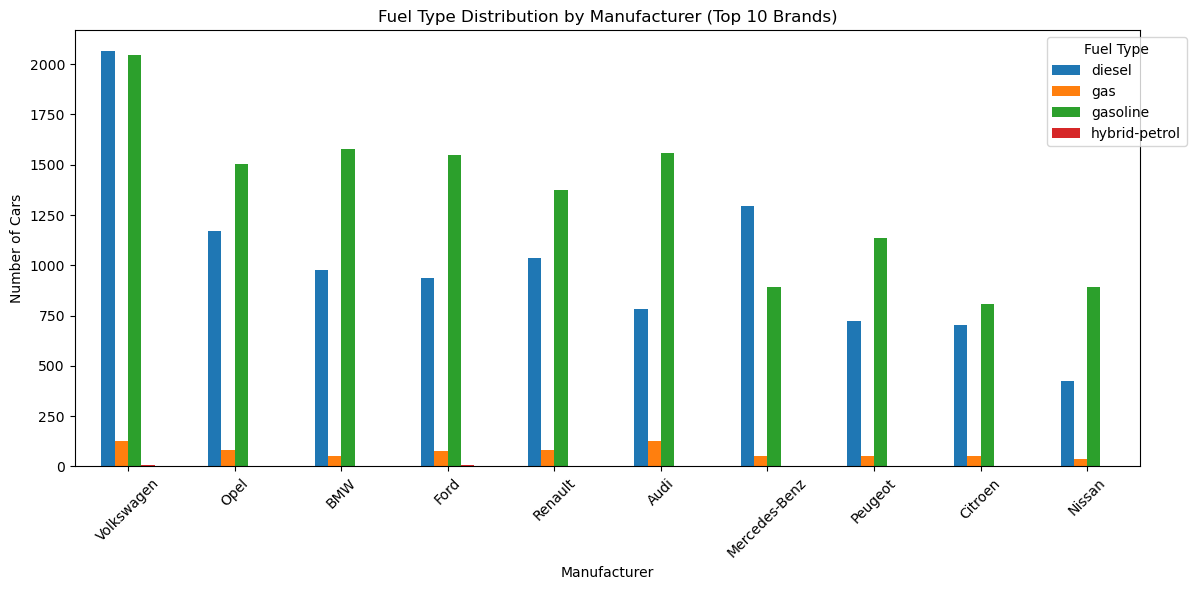

In [67]:
brand_fuel = pd.crosstab(
    df_clean['manufacturer_name'],
    df_clean['engine_fuel']
)

brand_fuel_top10 = brand_fuel.loc[top10_brands.index]

brand_fuel_top10.plot(
    kind="bar",
    figsize=(12,6)
)

plt.title("Fuel Type Distribution by Manufacturer (Top 10 Brands)")
plt.ylabel("Number of Cars")
plt.xlabel("Manufacturer")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()
